In [1]:
import matplotlib.pyplot as plt
import json

In [2]:
BLEU_list = []
BP_list = []

for i in range(1, 25):
    # read json file
    with open('{}/score.txt'.format(i)) as f:
        data = json.load(f)
        bleu = data['score']
        verbose_score = data['verbose_score']
        parts = verbose_score.split()
        bp = 0
        for part in parts:
            if part.startswith('(BP'):
                # bp is the next next part
                bp = float(parts[parts.index(part) + 2])
                break
        BLEU_list.append(bleu)
        BP_list.append(bp)

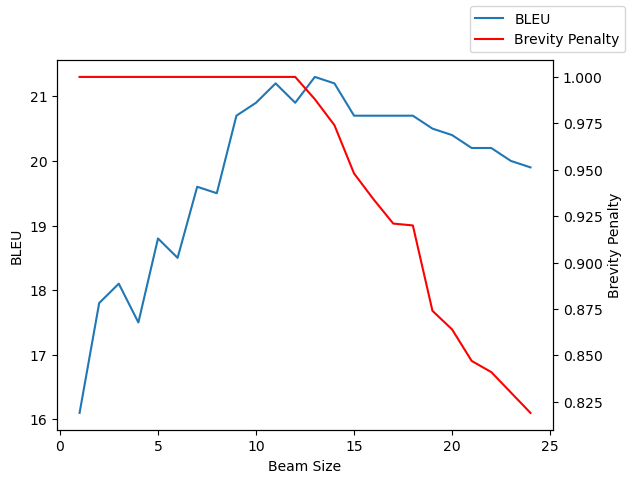

In [3]:
fig, ax1 = plt.subplots()
ax1.plot(range(1, 25), BLEU_list)
ax1.set_xlabel('Beam Size')
ax1.set_ylabel('BLEU')

ax2 = ax1.twinx()
ax2.plot(range(1, 25), BP_list, 'r')
ax2.set_ylabel('Brevity Penalty')

fig.legend(['BLEU', 'Brevity Penalty'], loc='upper right')
fig.savefig('BLEU_BP.png')